# Testing the RAID Benchmark

We've just realized that the RAID benchmark consists of roughly 98% *only* AI-generated text. There is hardly any human text in there. Can we fool the benchmark by simply submitting predictions based on random distributions?


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [11]:
np.random.seed(42)
n_total = 260_000
percentage_first = 0.029  # 2.9%

In [13]:
# Read in the prediction template and count the objects
input_path = "/resources/public/boenisch/PrismAI/random-RAID-predictions.json"
with open(input_path, 'r') as f:
    data = json.load(f)

n_total = len(data)
print(data[:3])
print(f"Total data points: {n_total}")

[{'id': '64005577-3d63-4583-8945-7541d3e53e7d', 'score': 0.5604532957077026}, {'id': '62b5f5fb-bf37-481d-9783-c40c4344b8e0', 'score': 0.5847579836845398}, {'id': '374afebd-1580-4f57-9aa1-8746d7d1ec8a', 'score': 0.5605904459953308}]
Total data points: 672000


In [14]:
n_first = int(n_total * percentage_first)
n_second = n_total - n_first

# Create two Gaussian distributions
mu1, sigma1 = 0.25, 0.02  # Around 0.25
mu2, sigma2 = 0.75, 0.02  # Around 0.75

dist1_samples = np.random.normal(loc=mu1, scale=sigma1, size=n_first)
dist2_samples = np.random.normal(loc=mu2, scale=sigma2, size=n_second)

In [15]:
# Combine and shuffle them for the RAID testing.
combined = np.concatenate([dist1_samples, dist2_samples])
np.random.shuffle(combined)

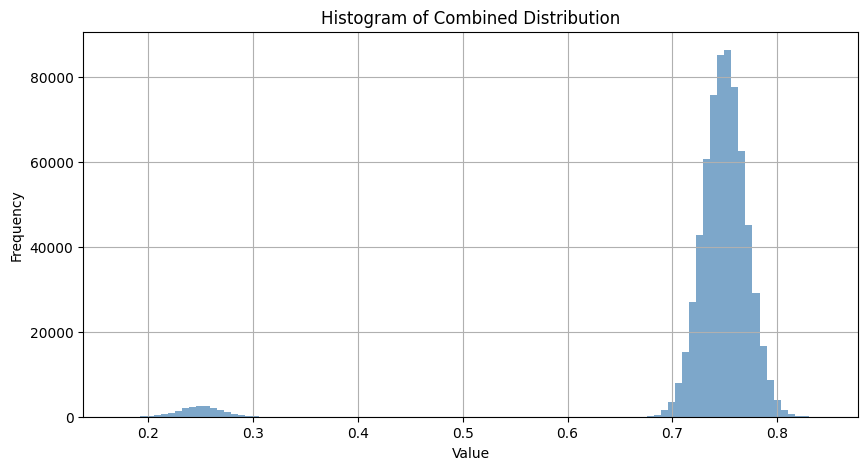

In [16]:
plt.figure(figsize=(10, 5))
plt.hist(combined, bins=100, color='steelblue', alpha=0.7)
plt.title("Histogram of Combined Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [17]:
print(f"Total samples: {len(combined)}")
print(f"From dist1 (around 0.25): {n_first} ({n_first / n_total:.2%})")
print(f"From dist2 (around 0.75): {n_second} ({n_second / n_total:.2%})")

Total samples: 672000
From dist1 (around 0.25): 19488 (2.90%)
From dist2 (around 0.75): 652512 (97.10%)


In [18]:
# Replace the old predictions with the randomly generated ones
for i, obj in enumerate(data):
    obj["score"] = float(combined[i])

In [19]:
output_path = "gaussian-RAID-predictions.json"
with open(output_path, 'w') as f:
    json.dump(data, f, indent=4)

print(f"Updated predictions saved to {output_path}")

Updated predictions saved to gaussian-RAID-predictions.json
